<h1>Wisonsin Breast Cancer Data - A supervised learning predictive analysis</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<p>First let us import the dataset and inspect its samples and attributes</p>

In [3]:
df = pd.read_csv('breast-cancer-wisconsin.csv')

<p>We print a random sample of 10 observations to ascertain if the data was correctly imported</p>

In [137]:
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
49,857156,B,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,...,15.150,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
568,92751,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039
487,913505,M,19.440,18.82,128.10,1167.0,0.10890,0.14480,0.22560,0.11940,...,23.960,30.39,153.90,1740.0,0.15140,0.37250,0.59360,0.20600,0.3266,0.09009
98,862485,B,11.600,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,...,13.060,17.16,82.96,512.5,0.14310,0.18510,0.19220,0.08449,0.2772,0.08756
490,91376701,B,12.250,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,...,14.170,31.99,92.74,622.9,0.12560,0.18040,0.12300,0.06335,0.3100,0.08203
66,859464,B,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.01504,...,10.410,31.56,67.03,330.7,0.15480,0.16640,0.09412,0.06517,0.2878,0.09211
268,8910506,B,12.870,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,...,13.900,23.64,89.27,597.5,0.12560,0.18080,0.19920,0.05780,0.3604,0.07062
454,911202,B,12.620,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,...,14.340,22.15,91.62,633.5,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330
271,8910748,B,11.290,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,...,12.320,16.18,78.27,457.5,0.13580,0.15070,0.12750,0.08750,0.2733,0.08022
256,88649001,M,19.550,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,...,25.050,36.27,178.60,1926.0,0.12810,0.53290,0.42510,0.19410,0.2818,0.10050


<h4>Dataset dimensions</h4>

In [5]:
df.shape

(569, 32)

<p>As we can see, the dataset containes 569 observations with 32 attributes. Of these attributes we can see that three specific measurements of the tumors have been provided. The means of certain measurement attributes, mean, se and worst. For the purposes of this analysis, we will deal with the mean measurements of the tumors. This should give us 10 distinct different attributes that will act as predictors for our supervised learning models. The independent variable will be the type of cancer diagnosis viz. benign or malignant.</p>
</br>
<p>But before proceeding, we need to inspect our samples and generate appropriate summaries thereof. Let us start by gathering the non-null value counts and data types of each field in our dataset. These observations will lay the groundwork for any data wrangling that needs to be performed on the dataset.</p>

In [ ]:
df.info()

<p>As we see, the column datatypes are all that we expect them to be. The id column is the only integer column (this should be irrelevant for our purposes anyway!!!), 
the diagnosis column is of type object(string) and all of the other fields are floats. We also see that there are no NA or null values in the observation data and thus missing data problems do not need to be dealt with</p>

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<p>Next, we obtain summaries of the various int/float varibles (viz. the five point summary). Later revisions of the analysis will include plots for univariate and bivariate EDA. </p>

In [8]:
df[df['diagnosis']=='M']['id'].count()

212

In [9]:
df[df['diagnosis']=='B']['id'].count()

357

<p>Within the observations, we notice that there are 212 instances where the tumor has been diagnosed to be "Malignant" and 357 instances where it is deemed to be "Benign".</p>

In [10]:
y=df.iloc[:,[1]]

<p>Now we move on to process of creating our dependent variable vector. We can extract it directly from the dataset as it lies at the ordinal position 2(column index 1).</p>

In [11]:
y=pd.DataFrame(np.where(y['diagnosis']=='M',1,0), columns=['diagnosis'])

<p>We now encode the string diagnosis into 0's and 1's. Thus we can deem our supervised learning problem as a binary classification problem. The encoding specifies "Benign" observations as 0 and "Malignant" observations as 1.</p>

<p>Finally, we need to obtain our independent variable matrix. As discussed above, we are only considering the mean tumor measurments as our predictors and as such we need to subset our dataset to obtain the necessary columns.</p>

In [12]:
X=df.iloc[:,1:12].drop(columns=['diagnosis'])

<p>We view the first few observations of this subsetted data to confirm that it is OK for further processing</p>

In [ ]:
X.head()

<h2>Data Pre-processing</h2>

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<p>As a crucial step in our predictive analysis process, we need to standardise our variables to have 0 mean and unit standard deviation. This is necessary while fitting our models with different estimators as such standardisation is required for regularisation process. Any dimensionality reduction processes techniques  <b>must</b> also be performed on standardised data.</p>

<p>The first stage of our data preprocessing phase will be splitting up the dataset into train and test observations. In line with traditional machine learning conventions, the models will be trained on the training set and will be evaluated on our test set observations.
We In this process, we specify that the test set will be a quarter, in size, of the training set. This will be an accurate train to test ratio to accomodate for bias-variance tradeoff concerns.</p>

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

<h4>Standardisation of variables</h4>
<p>After our datasets have been prepared, we now move onto the standardisation of the variables. This will be done with the StandardScaler class imported from the sklearn.preprocessing module.</p>

In [16]:
sc_X=StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

<h2>Model Fitting</h2>

<p>Now with our data prepared, we can move on to creating predictive models for our data. Since this is a binary classification problem we can consider traditional classification estimators such as logistic regression and Support Vector Machines. We....... </p>

<h3>Logistic Regression</h3>

<p>For this binary classification problem, the first model we will consider will be Logistic Regression Estimator. We will train the model, predict results from the test set and extract certain metrics to evaluate the performance of the model and understand the extent of the bias-variance tradeoff. We will then attempt to improve the model by fine-tuning the appropriate hyperparameters.</p>

In [17]:
from sklearn.feature_selection import f_classif
p_val = f_classif(X_train,y_train)[1]
p_val

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2.55823842e-69, 8.37108067e-18, 8.19690935e-73, 1.48052645e-62,
       1.27734112e-15, 9.49913611e-45, 1.45377554e-60, 8.98762428e-87,
       3.44436651e-13, 6.30247708e-01])

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
mean_logit_classifier = LogisticRegression(random_state=0)
mean_logit_classifier.fit(X_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<p>Here, we have fitted the model against the training data.</p>

<p>Let us find out the co-efficients of the logistic regression model</p>

<p>Let us try to find the co-efficients for the predictors of the logistic regression model so fitted.</p>

In [20]:
#Logit co-efficients
predictors = X.columns
coeffs = mean_logit_classifier.coef_[0]

In [35]:
predictor_coefficients_logit = pd.DataFrame(columns=['predictor','co-efficient'])
for i in range(len(predictors)):
    predictor_coefficients_logit.loc[i]=[predictors[i], coeffs[i]]
    
predictor_coefficients_logit

,predictor,co-efficient
0,radius_mean,1.010016
1,texture_mean,1.344157
2,perimeter_mean,0.933628
3,area_mean,1.178509
4,smoothness_mean,1.020748
5,compactness_mean,-0.021437
6,concavity_mean,0.775319
7,concave points_mean,1.464834
8,symmetry_mean,0.569714
9,fractal_dimension_mean,-0.482281


<p><b>Note:</b> Here we have defaulted to L2 regularisation while fitting the model. As the number of predictors is quite insignificant and feature selection/elimination is not quite as important for this analysis as evaluating model accuracy and improving it, we will not create L2 models explicitly. However, as a brief exercise we will train a LinearRegression model with an L2 penalty and understand the relative significance of the predictors. Let's do that briefly in the section below.</p>

In [144]:
mean_logit_classifier_l2 = LogisticRegression(random_state=0, penalty='l1')
mean_logit_classifier_l2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
#Logit co-efficients with l2 penalty
predictors_l2 = X.columns
coeffs_l2 = mean_logit_classifier_l2.coef_[0]

predictor_coefficients_logit_l2 = pd.DataFrame(columns=['predictor','co-efficient'])
for i in range(len(predictors_l2)):
    predictor_coefficients_logit_l2.loc[i]=[predictors_l2[i], coeffs_l2[i]]
    
predictor_coefficients_logit_l2

,predictor,co-efficient
0,radius_mean,0.000000
1,texture_mean,1.363975
2,perimeter_mean,0.000000
3,area_mean,3.388673
4,smoothness_mean,0.855911
5,compactness_mean,0.000000
6,concavity_mean,0.320355
7,concave points_mean,2.081595
8,symmetry_mean,0.520325
9,fractal_dimension_mean,-0.241610


<h4>Prediction and model performance</h4>

<p>Now we move on to the crucial aspect of our analysis. Evaluating the performance of the model and improving the accuracy of the test set predictions. This section will also include estimating if the model is overfitted and unlikely to perform well against a variety of test sets. To that end, we will implement k-fold cross validation and understand the performance of the model in more concrete terms.</p>

<p>First, let's predict the test set results. Now here, the prediction threshold for binary classification is 0.5 and therefore we will get predicted value of 1 if the probability f maignancy predicted by the estimator is greater than 1. However, for such crucial examinations as the detection of malignancy in breast cancer cells, even a threshold of 0.5 may be too high. We will dig deeper into modifying this theshold, making predictions on the basis of this changed threshold and the implications thereof, later on in this analysis</p>

In [52]:
y_pred_logit = mean_logit_classifier.predict(X_test)

<p>Here are the first 10 prediction results of the estimator</p>

In [53]:
y_pred_logit[0:20]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1])

In [24]:
y_pred_prob = mean_logit_classifier.predict_proba(X_test)[:,1]

<p>We also find out the actual probabilities </p>

In [25]:
y_pred_prob[0:20]

array([8.70663573e-01, 1.50668821e-01, 8.87958890e-03, 6.35920359e-03,
       1.51728565e-02, 2.76162846e-02, 3.92385943e-03, 6.02292943e-03,
       3.30327592e-04, 5.42583994e-04, 3.63808472e-01, 3.78907969e-01,
       2.22897446e-04, 4.13229871e-01, 7.58758773e-01, 9.68175637e-01,
       1.67628654e-02, 9.99897673e-01, 9.99910813e-01, 9.99998108e-01])

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [27]:
cm_logit_mean = confusion_matrix(y_test, y_pred)

In [28]:
cm_logit_mean

array([[86,  4],
       [ 5, 48]], dtype=int64)

In [29]:
accuracy_score_logit_mean = accuracy_score(y_test, y_pred)
accuracy_score_logit_mean

0.9370629370629371

In [30]:
##Calculating the null accuracy
null_accuracy_score = y_test[y_test['diagnosis']==0]['diagnosis'].count()/y_test['diagnosis'].count()
null_accuracy_score

0.6293706293706294

In [50]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuracies_logit_mean = cross_val_score(estimator=mean_logit_classifier, X=X_train, y=y_train, cv=10)
print('Accuracies of training folds are :'+str(accuracies_logit_mean))
print('Mean accuracy after cross validation :' +str(accuracies_logit_mean.mean()))

Accuracies of training folds are :[0.90697674 0.97674419 0.93023256 0.90697674 0.88372093 0.93023256
 0.93023256 0.92857143 0.97619048 0.95121951]
Mean accuracy after cross validation :0.9321097696026793


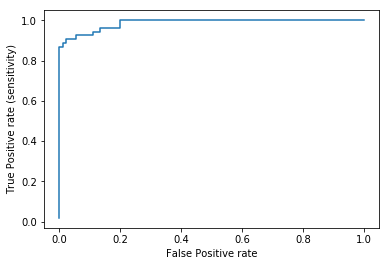

In [126]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate (sensitivity)')
plt.show()


In [114]:
area_under_roc_curve = roc_auc_score(y_test, y_pred_prob)
area_under_roc_curve

0.9861635220125786

<h5>Hyperparameter optimisation for Logistic Regression Model</h5>

In [155]:
C_value = np.arange(start=1, stop=20, step=1)

In [156]:
scores_opt_logit=[]
for i in C_value:
    mean_logit_classifier_opt = LogisticRegression(C=i,random_state=0)
    score_opt_logit = cross_val_score(estimator=mean_logit_classifier_opt, cv=10, X=X_train, y=y_train, scoring='accuracy')
    scores_opt_logit.append(score_opt_logit.mean())

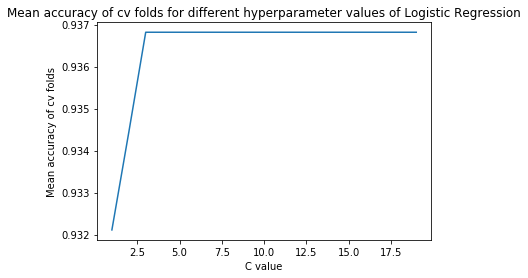

In [157]:
plt.plot(C_value,scores_opt_logit)
plt.xlabel('C value')
plt.ylabel('Mean accuracy of cv folds')
plt.title('Mean accuracy of cv folds for different hyperparameter values of Logistic Regression')
plt.show()

<h3>SVM</h3>

<h4>Linear Support Vector Classifier</h4>

In [70]:
from sklearn.svm import SVC
mean_svm_linear_classifier = SVC(kernel='linear', random_state=0)
mean_svm_linear_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
y_pred_svm_linear = mean_svm_linear_classifier.predict(X_test)

In [72]:
cm_svm_linear_mean = confusion_matrix(y_test, y_pred)

In [73]:
cm_svm_linear_mean

array([[85,  5],
       [ 5, 48]], dtype=int64)

In [74]:
accuracy_score_svm_linear_mean = accuracy_score(y_test, y_pred_svm_linear)
accuracy_score_svm_linear_mean

0.9300699300699301

In [75]:
import warnings
warnings.filterwarnings('ignore')

accuracies_svm_linear_mean = cross_val_score(estimator=mean_svm_linear_classifier, X=X_train, y=y_train, cv=10)
print('Accuracies of training folds are :'+str(accuracies_svm_linear_mean))
print('Mean accuracy after cross validation :' +str(accuracies_svm_linear_mean.mean()))

Accuracies of training folds are :[0.90697674 0.95348837 0.95348837 0.93023256 0.88372093 0.93023256
 0.93023256 0.92857143 0.97619048 0.92682927]
Mean accuracy after cross validation :0.9319963266077844


<h4>Support Vector Classifier with Radial (Gaussian) Kernel</h4>

In [97]:
mean_svm_radial_classifier = SVC(kernel='rbf', random_state=0)
mean_svm_radial_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [98]:
y_pred_svm_radial = mean_svm_radial_classifier.predict(X_test)

In [99]:
cm_svm_radial_mean = confusion_matrix(y_test, y_pred_svm_radial, labels=[0,1])

In [100]:
cm_svm_radial_mean

array([[88,  2],
       [ 5, 48]], dtype=int64)

In [101]:
accuracy_score_svm_radial_mean = accuracy_score(y_test, y_pred_svm_radial)
accuracy_score_svm_radial_mean

0.951048951048951

In [102]:
import warnings
warnings.filterwarnings('ignore')

accuracies_svm_radial_mean = cross_val_score(estimator=mean_svm_radial_classifier, X=X_train, y=y_train, cv=10)
print('Accuracies of training folds are :'+str(accuracies_svm_radial_mean))
print('Mean accuracy after cross validation :' +str(accuracies_svm_radial_mean.mean()))

Accuracies of training folds are :[0.90697674 0.93023256 0.97674419 0.93023256 0.90697674 0.95348837
 0.93023256 0.95238095 1.         0.95121951]
Mean accuracy after cross validation :0.9438484185506306


<h5>Hyperparameter optimisation for Gaussian Kernel SVM</h5>

In [146]:
C_value = np.arange(start=1, stop=20, step=1)

In [147]:
scores_opt=[]
for i in C_value:
    mean_svm_radial_classifier_opt = SVC(C=i, kernel='rbf', random_state=0)
    score_opt = cross_val_score(estimator=mean_svm_radial_classifier_opt, cv=10, X=X_train, y=y_train, scoring='accuracy')
    scores_opt.append(score_opt.mean())

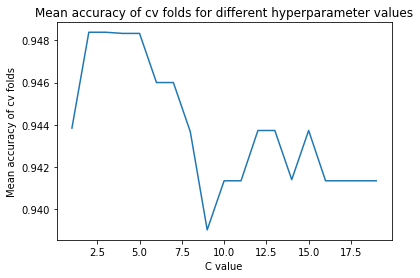

In [148]:
plt.plot(C_value,scores_opt)
plt.xlabel('C value')
plt.ylabel('Mean accuracy of cv folds')
plt.title('Mean accuracy of cv folds for different hyperparameter values of Gaussian Kernel SVM')
plt.show()